In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

(0, 1)

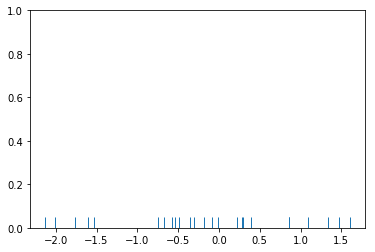

In [2]:
dataset = randn(25)
# ラグプロット
sns.rugplot(dataset)
plt.ylim(0,1)

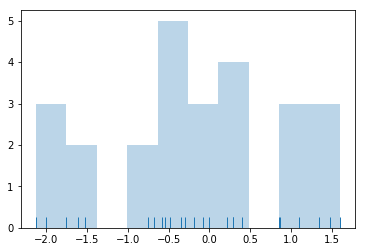

In [3]:
# ヒストグラムを重ねる
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

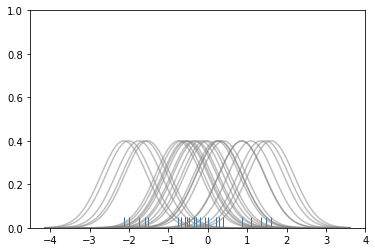

In [4]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を100分割する
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))** 0.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis,kernel,color='gray',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

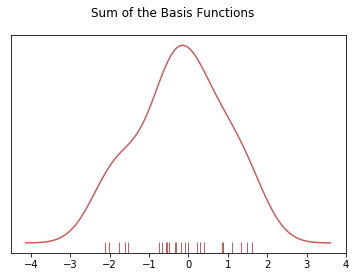

In [5]:
# 手動でKDEを作る
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c='indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


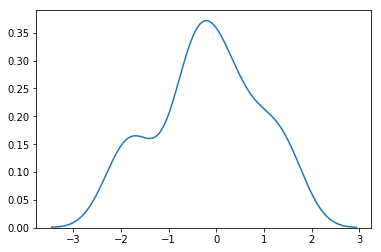

In [6]:
# カーネル密度関数が1行でできる
sns.kdeplot(dataset)

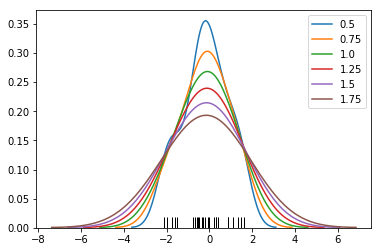

In [7]:
sns.rugplot(dataset,color='black')
# バンド幅を変える
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


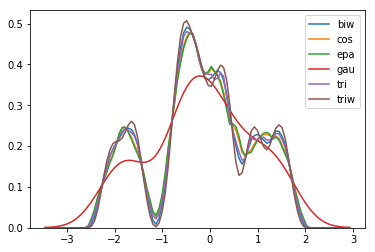

In [8]:
# 分布を変えてみる
kernel_options = ["biw","cos","epa","gau","tri","triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


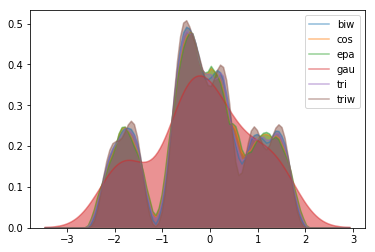

In [9]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


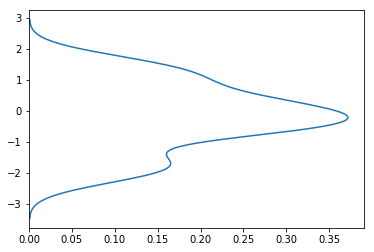

In [10]:
# 軸を入れ替える
sns.kdeplot(dataset,vertical=True)

(array([ 3.,  5.,  5.,  7., 12., 15., 19., 19., 22., 25.]),
 array([-2.12761841, -1.75461533, -1.38161225, -1.00860916, -0.63560608,
        -0.262603  ,  0.11040008,  0.48340317,  0.85640625,  1.22940933,
         1.60241242]),
 <a list of 10 Patch objects>)

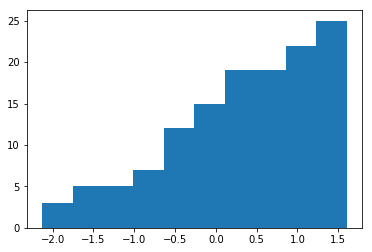

In [11]:
# 累積分布関数
plt.hist(dataset,cumulative=True)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


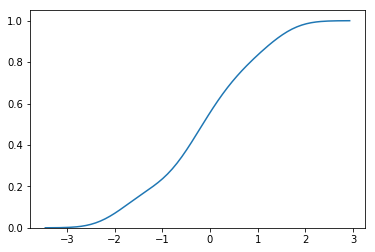

In [12]:
sns.kdeplot(dataset,cumulative=True)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


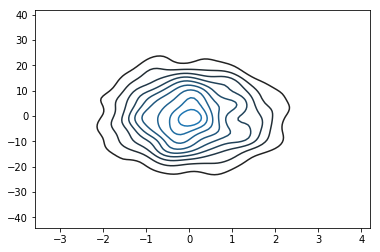

In [13]:
# 二次元平面上の中心
mean = [0,0]
# それぞれの分散を決める
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにする
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットする
sns.kdeplot(dframe)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


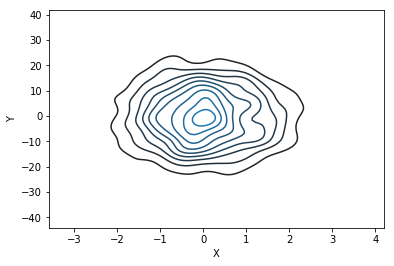

In [14]:
# 軸ごとにデータを渡せる
sns.kdeplot(dframe.X,dframe.Y)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


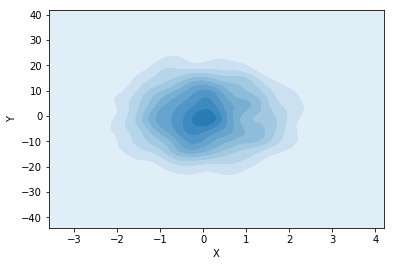

In [15]:
sns.kdeplot(dframe.X,dframe.Y, shade=True)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


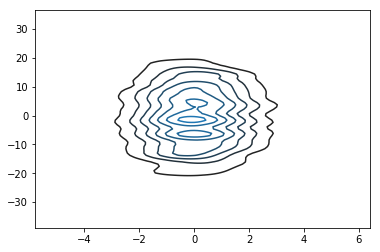

In [16]:
# バンド幅を変える
sns.kdeplot(dframe,bw=1)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


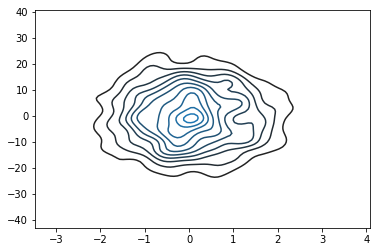

In [18]:
# バンド幅はプリセットの文字列でも渡せる
sns.kdeplot(dframe,bw='silverman')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


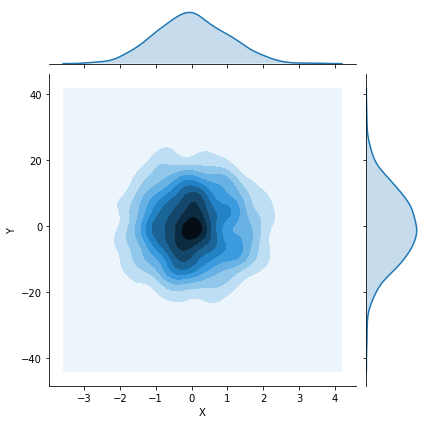

In [19]:
# 同時分布の推定も可能
sns.jointplot('X','Y',dframe,kind='kde')